In [1]:
#Importing
import pandas as pd
import numpy as np
import math
from Potato import plotparams
import matplotlib.pyplot as plt

In [2]:
#This is to read my csv files
Gaia0 = pd.read_csv('Research/Index0_GaiaX')
Gaia1 = pd.read_csv('Research/Index1_GaiaX')
Dipper = pd.read_csv('Research/DippersXGaia.csv')

#Extinciton files
Ext13_13_5 = pd.read_csv('Research/index_13_13.5_subset.csv')
Ext13_5_14 = pd.read_csv('Research/index_13.5_14_subset.csv')
ExtDip = pd.read_csv('Research/DippersXGaia_extinctions.csv')

/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_51810/737715866.py:2: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia0 = pd.read_csv('Research/Index0_GaiaX')
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_51810/737715866.py:3: DtypeWarning: Columns (6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia1 = pd.read_csv('Research/Index1_GaiaX')


In [3]:
#Removing bad (negative) parallaxes
good_plx0 = Gaia0.loc[Gaia0['plx'] > 0].reset_index(drop=True)

good_plx1 = Gaia1.loc[Gaia1['plx'] > 0].reset_index(drop=True)

good_plxD = Dipper.loc[Dipper['Plx'] > 0].reset_index(drop=True)

In [4]:
#Checking the errors
good_plx0['plx_e_plx'] = good_plx0['plx'] / good_plx0['e_Plx']
gplx0 = good_plx0[good_plx0['plx_e_plx'] > 10].reset_index(drop=True)

good_plx1['plx_e_plx'] = good_plx1['plx'] / good_plx1['e_Plx']
gplx1 = good_plx1[good_plx1['plx_e_plx'] > 10].reset_index(drop=True)

good_plxD['plx_e_plx'] = good_plxD['Plx'] / good_plxD['e_Plx']
gplxD = good_plxD#[good_plxD['plx_e_plx']].reset_index(drop=True)

In [5]:
#Finding the corresponding Extinction
Ext13ID0 = gplx0['asas_sn_id']
Ext13_0 = pd.DataFrame()
for i in Ext13ID0:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_0 = pd.concat([Ext13_0,row]).reset_index(drop=True)

Ext14ID0 = gplx0['asas_sn_id']
Ext14_0 = pd.DataFrame()
for i in Ext14ID0:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_0 = pd.concat([Ext14_0,row]).reset_index(drop=True)

Ext0 = pd.concat([Ext13_0,Ext14_0])


Ext13ID1 = gplx1['asas_sn_id']
Ext13_1 = pd.DataFrame()
for i in Ext13ID1:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_1 = pd.concat([Ext13_1,row]).reset_index(drop=True)

Ext14ID1 = gplx1['asas_sn_id']
Ext14_1 = pd.DataFrame()
for i in Ext14ID1:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_1 = pd.concat([Ext14_1,row]).reset_index(drop=True)

Ext1 = pd.concat([Ext13_1,Ext14_1])


Ext13IDD = gplxD['Asas-sn-id']
Ext13_D = pd.DataFrame()
for i in Ext13IDD:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_D = pd.concat([Ext13_D,row]).reset_index(drop=True)

Ext14IDD = gplxD['Asas-sn-id']
Ext14_D = pd.DataFrame()
for i in Ext14IDD:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_D = pd.concat([Ext14_D,row]).reset_index(drop=True)

ExtIDDip = gplxD['Asas-sn-id']
ExtDip_D = pd.DataFrame()
for i in ExtIDDip:
    row = ExtDip.loc[ExtDip['asas_sn_id'] == i].reset_index(drop=True)
    ExtDip_D = pd.concat([ExtDip_D,row]).reset_index(drop=True)

ExtDipper = pd.concat([Ext13_D,Ext14_D,ExtDip_D])

In [6]:
#Add the extinction to dataframes
AID130 = Ext0['asas_sn_id']
gp0 = gplx0['asas_sn_id']
df0 = pd.DataFrame()
for i in AID130:
    row = gplx0.loc[gplx0['asas_sn_id'] == i].reset_index(drop=True)
    df0 = pd.concat([df0,row]).reset_index(drop=True)
df0E = df0.merge(Ext0[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


AID131 = Ext1['asas_sn_id']
gp1 = gplx1['asas_sn_id']
df1 = pd.DataFrame()
for i in AID131:
    row = gplx1.loc[gplx1['asas_sn_id'] == i].reset_index(drop=True)
    df1 = pd.concat([df1,row]).reset_index(drop=True)
df1E = df1.merge(Ext1[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


ExtDipper.rename(columns={'asas_sn_id':'Asas-sn-id'}, inplace=True)
AID13D = ExtDipper['Asas-sn-id']
gpD = gplxD['Asas-sn-id']
dfD = pd.DataFrame()
for i in AID13D:
    row = gplxD.loc[gplxD['Asas-sn-id'] == i].reset_index(drop=True)
    dfD = pd.concat([dfD,row]).reset_index(drop=True)
dfDE = dfD.merge(ExtDipper[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','Asas-sn-id']], on='Asas-sn-id',how='left')

In [7]:
#Dividing the known into their catagories
dfDE = dfDE.loc[dfDE['Asas-sn-id'] != 85900493523].reset_index(drop=True)

A24fa = dfDE.loc[dfDE['Known'] == 2].reset_index(drop=True)

Binary = dfDE.loc[dfDE['Binary'] == 1].reset_index(drop=True)

Known = dfDE.loc[dfDE['Known'] == 1].reset_index(drop=True)

NewDip1 = dfDE.loc[dfDE['Dipper'] == 1].reset_index(drop=True)
NewDip = NewDip1.loc[NewDip1['Known'] == 0].reset_index(drop=True)

In [8]:
#Distances
dist0 = 1000 / df0E['plx']

dist1 = 1000 / df1E['plx']

dist24fa = 1000 / A24fa['Plx']

distBin = 1000 / Binary['Plx']

distKnown = 1000 / Known['Plx']

distND = 1000 / NewDip['Plx']

In [9]:
#Magnitude
#mag = -2.5log10(flux)
mag0 = df0E['Gmag']
Mag0 = []
for i in range(len(mag0)):
    Mag0.append(mag0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_ag'][i])

mag1 = df1E['Gmag']
Mag1 = []
for i in range(len(mag1)):
    Mag1.append(mag1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_ag'][i])

mag24fa = A24fa['Gmag']
Mag24fa = []
for i in range(len(mag24fa)):
    Mag24fa.append(mag24fa[i] + 5 - (5 * math.log10(dist24fa[i])) - A24fa['mwdust_ag'][i])

magBin = Binary['Gmag']
MagBin = []
for i in range(len(magBin)):
    MagBin.append(magBin[i] + 5 - (5 * math.log10(distBin[i])) - Binary['mwdust_ag'][i])

magKnown = Known['Gmag']
MagKnown = []
for i in range(len(magKnown)):
    MagKnown.append(magKnown[i] + 5 - (5 * math.log10(distKnown[i])) - Known['mwdust_ag'][i])

magND = NewDip['Gmag']
MagND = []
for i in range(len(magND)):
    MagND.append(magND[i] + 5 - (5 * math.log10(distND[i])) - NewDip['mwdust_ag'][i])

In [10]:
#Color
bp0 = df0E['BPmag']
rp0 = df0E['RPmag']
BP0 = []
RP0 = []
for i in range(len(bp0)):
    BP0.append(bp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_abp'][i])
for i in range(len(rp0)):
    RP0.append(rp0[i] + 5 - (5 * math.log10(dist0[i])) - df0E['mwdust_arp'][i])
bprp0 = [x - y for x, y in zip(BP0,RP0)]

bp1 = df1E['BPmag']
rp1 = df1E['RPmag']
BP1 = []
RP1 = []
for i in range(len(bp1)):
    BP1.append(bp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_abp'][i])
for i in range(len(rp1)):
    RP1.append(rp1[i] + 5 - (5 * math.log10(dist1[i])) - df1E['mwdust_arp'][i])
bprp1 = [x - y for x, y in zip(BP1,RP1)]

bp24fa = A24fa['BPmag']
rp24fa = A24fa['RPmag']
BP24fa = []
RP24fa = []
for i in range(len(bp24fa)):
    BP24fa.append(bp24fa[i] + 5 - (5 * math.log10(dist24fa[i])) - A24fa['mwdust_abp'][i])
for i in range(len(rp24fa)):
    RP24fa.append(rp24fa[i] + 5 - (5 * math.log10(dist24fa[i])) - A24fa['mwdust_arp'][i])
bprp24fa = [x - y for x, y in zip(BP24fa,RP24fa)]

bpBin = Binary['BPmag']
rpBin = Binary['RPmag']
BPBin = []
RPBin = []
for i in range(len(bpBin)):
    BPBin.append(bpBin[i] + 5 - (5 * math.log10(distBin[i])) - Binary['mwdust_abp'][i])
for i in range(len(rpBin)):
    RPBin.append(rpBin[i] + 5 - (5 * math.log10(distBin[i])) - Binary['mwdust_arp'][i])
bprpBin = [x - y for x, y in zip(BPBin,RPBin)]

bpKnown = Known['BPmag']
rpKnown = Known['RPmag']
BPKnown = []
RPKnown = []
for i in range(len(bpKnown)):
    BPKnown.append(bpKnown[i] + 5 - (5 * math.log10(distKnown[i])) - Known['mwdust_abp'][i])
for i in range(len(rpKnown)):
    RPKnown.append(rpKnown[i] + 5 - (5 * math.log10(distKnown[i])) - Known['mwdust_arp'][i])
bprpKnown = [x - y for x, y in zip(BPKnown,RPKnown)]

bpND = NewDip['BPmag']
rpND = NewDip['RPmag']
BPND = []
RPND = []
for i in range(len(bpND)):
    BPND.append(bpND[i] + 5 - (5 * math.log10(distND[i])) - NewDip['mwdust_abp'][i])
for i in range(len(rpND)):
    RPND.append(rpND[i] + 5 - (5 * math.log10(distND[i])) - NewDip['mwdust_arp'][i])
bprpND = [x - y for x, y in zip(BPND,RPND)]

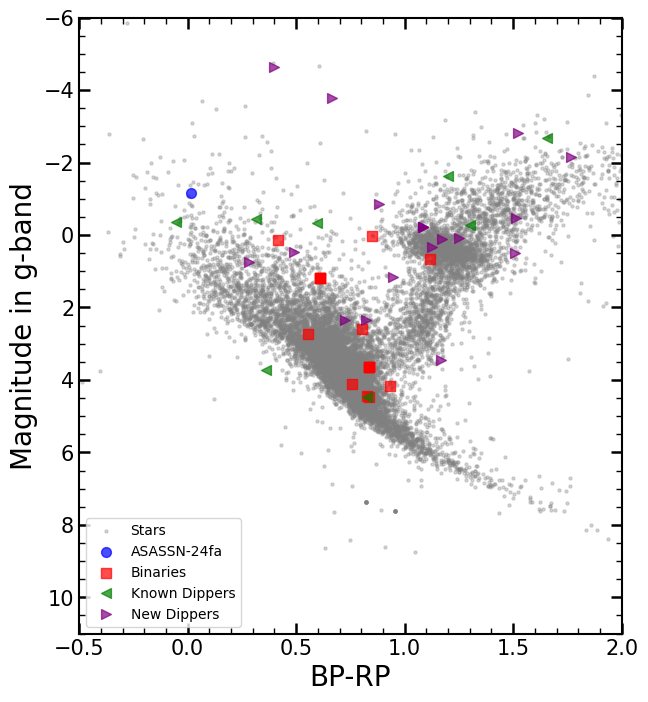

In [13]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')
ax.scatter(bprp24fa, Mag24fa, s=50, color='blue', alpha=0.7, label='ASASSN-24fa')
ax.scatter(bprpBin, MagBin, s=50, color='red', marker='s', alpha=0.7, label='Binaries')
ax.scatter(bprpKnown, MagKnown, s=50, color='green', marker='<', alpha=0.7, label='Known Dippers')
ax.scatter(bprpND, MagND, s=50, color='purple', marker='>', alpha=0.7, label='New Dippers')
ax.invert_yaxis()
ax.set_xlim(-0.5,2)
ax.set_ylim(11,-6)
ax.set_xlabel('BP-RP', fontsize=20)
ax.set_ylabel('Magnitude in g-band', fontsize=20)
ax.legend()

In [18]:
len(NewDip)
print(NewDip.head(22))

      Asas-sn-id          ra        dec  Known  Binary  Dipper  Period  \
0   661425129485  241.988525 -57.761063      0       0       1     NaN   
1   661425129485  241.988525 -57.761063      0       0       1     NaN   
2   120259184943  320.384047  48.027853      0       0       1     NaN   
3   515396514761  285.818495 -19.960933      0       0       1     NaN   
4   300648066206   93.703793 -12.333691      0       0       1     NaN   
5   412317159120  245.535756 -44.713081      0       0       1     NaN   
6    25770019815  344.258527  56.386633      0       0       1     NaN   
7   360777377116  115.027613 -16.268967      0       0       1     NaN   
8   463856535113  313.189042 -71.587087      0       0       1     NaN   
9   661425129485  241.988525 -57.761063      0       0       1     NaN   
10  661425129485  241.988525 -57.761063      0       0       1     NaN   
11   42950993887  306.009412  38.660551      0       0       1     NaN   
12  377957522430   65.557363  15.42493